In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
from keras.utils import to_categorical

In [6]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', num_classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  10


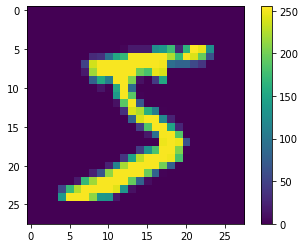

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
model1 = Sequential()

model1.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model1.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu',name="dense_1"))
model1.add(Dense(num_classes, activation='softmax',name="dense_2"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 203,898
Trainable params: 203,898
Non-trainable params: 0
________________________________________________

In [16]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [17]:
history1=model1.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 19s 78ms/step - loss: 0.6453 - accuracy: 0.8166 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 2/10
235/235 [==============================] - 19s 80ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.0589 - val_accuracy: 0.9814
Epoch 3/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 4/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0447 - val_accuracy: 0.9854
Epoch 5/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0405 - val_accuracy: 0.9879
Epoch 6/10
235/235 [==============================] - 20s 86ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0403 - val_accuracy: 0.9869
Epoch 7/10
235/235 [==============================] - 19s 83ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0398 - val_accuracy:

In [18]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0398 - accuracy: 0.9875


[0.039764512330293655, 0.987500011920929]

In [22]:
model1.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - accuracy: 0.9977


[0.008899643085896969, 0.9976666569709778]

In [27]:
model2 = Sequential()

model2.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model2.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu',name="dense_1"))
model2.add(Dense(num_classes, activation='softmax',name="dense_2"))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 405,306
Trainable params: 405,306
Non-trainable params: 0
________________________________________________

In [28]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history2=model2.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 18s 75ms/step - loss: 0.6310 - accuracy: 0.8253 - val_loss: 0.0876 - val_accuracy: 0.9739
Epoch 2/10
235/235 [==============================] - 17s 72ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0513 - val_accuracy: 0.9831
Epoch 3/10
235/235 [==============================] - 17s 72ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0425 - val_accuracy: 0.9832
Epoch 4/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 5/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 6/10
235/235 [==============================] - 17s 74ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 7/10
235/235 [==============================] - 17s 72ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0333 - val_accuracy:

In [36]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9873


[0.03805887699127197, 0.9872999787330627]

In [37]:
model2.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9985


[0.005504933651536703, 0.9985166788101196]

In [41]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model3.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(32, activation='relu',name="dense_1"))
model3.add(Dense(num_classes, activation='softmax',name="dense_2"))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                100384    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 103,194
Trainable params: 103,194
Non-trainable params: 0
________________________________________________

In [42]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history3=model3.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 21s 86ms/step - loss: 0.7657 - accuracy: 0.7867 - val_loss: 0.1368 - val_accuracy: 0.9608
Epoch 2/10
235/235 [==============================] - 19s 83ms/step - loss: 0.1270 - accuracy: 0.9630 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 3/10
235/235 [==============================] - 21s 88ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0594 - val_accuracy: 0.9810
Epoch 4/10
235/235 [==============================] - 21s 88ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0531 - val_accuracy: 0.9829
Epoch 5/10
235/235 [==============================] - 19s 80ms/step - loss: 0.0465 - accuracy: 0.9867 - val_loss: 0.0464 - val_accuracy: 0.9837
Epoch 6/10
235/235 [==============================] - 19s 81ms/step - loss: 0.0385 - accuracy: 0.9886 - val_loss: 0.0455 - val_accuracy: 0.9839
Epoch 7/10
235/235 [==============================] - 21s 91ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0417 - val_accuracy:

In [43]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.9861


[0.04281231388449669, 0.9861000180244446]

In [44]:
model3.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0167 - accuracy: 0.9951


[0.0167115218937397, 0.9951333403587341]

In [51]:
model4 = Sequential()

model4.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model4.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(16, activation='relu',name="dense_1"))
model4.add(Dense(num_classes, activation='softmax',name="dense_2"))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                50192     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 52,842
Trainable params: 52,842
Non-trainable params: 0
__________________________________________________

In [52]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history4=model4.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 18s 73ms/step - loss: 0.9606 - accuracy: 0.7108 - val_loss: 0.1691 - val_accuracy: 0.9497
Epoch 2/10
235/235 [==============================] - 17s 73ms/step - loss: 0.1424 - accuracy: 0.9592 - val_loss: 0.0876 - val_accuracy: 0.9736
Epoch 3/10
235/235 [==============================] - 17s 74ms/step - loss: 0.0848 - accuracy: 0.9755 - val_loss: 0.0653 - val_accuracy: 0.9796
Epoch 4/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0661 - accuracy: 0.9809 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 5/10
235/235 [==============================] - 18s 78ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0520 - val_accuracy: 0.9835
Epoch 6/10
235/235 [==============================] - 19s 79ms/step - loss: 0.0499 - accuracy: 0.9850 - val_loss: 0.0756 - val_accuracy: 0.9766
Epoch 7/10
235/235 [==============================] - 18s 76ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0544 - val_accuracy:

In [53]:
model4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9856


[0.04678438976407051, 0.9855999946594238]

In [54]:
model4.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0281 - accuracy: 0.9915


[0.028124311938881874, 0.9914666414260864]

In [57]:
model5 = Sequential()

model5.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model5.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
model5.add(Dense(10, activation='relu',name="dense_1"))
model5.add(Dense(num_classes, activation='softmax',name="dense_2"))

model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 33,960
Trainable params: 33,960
Non-trainable params: 0
__________________________________________________

In [58]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history5=model5.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 17s 72ms/step - loss: 1.1748 - accuracy: 0.6125 - val_loss: 0.2476 - val_accuracy: 0.9310
Epoch 2/10
235/235 [==============================] - 17s 73ms/step - loss: 0.2142 - accuracy: 0.9397 - val_loss: 0.1264 - val_accuracy: 0.9628
Epoch 3/10
235/235 [==============================] - 18s 75ms/step - loss: 0.1298 - accuracy: 0.9619 - val_loss: 0.1027 - val_accuracy: 0.9673
Epoch 4/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0927 - accuracy: 0.9730 - val_loss: 0.0864 - val_accuracy: 0.9720
Epoch 5/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0810 - accuracy: 0.9757 - val_loss: 0.0758 - val_accuracy: 0.9759
Epoch 6/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0683 - accuracy: 0.9803 - val_loss: 0.0672 - val_accuracy: 0.9794
Epoch 7/10
235/235 [==============================] - 17s 72ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0595 - val_accuracy:

In [59]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0543 - accuracy: 0.9831


[0.05427676439285278, 0.9830999970436096]

In [60]:
model5.evaluate(x_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0386 - accuracy: 0.9882


[0.038573987782001495, 0.9881666898727417]

In [64]:
model6 = Sequential()

model6.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(10, activation='relu',name="dense_1"))
model6.add(Dense(num_classes, activation='softmax',name="dense_2"))

model6.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 31,640
Trainable params: 31,640
Non-trainable params: 0
_________________________________________________________________


In [65]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history6=model6.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 1.3568 - accuracy: 0.5550 - val_loss: 0.3336 - val_accuracy: 0.9040
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3266 - accuracy: 0.9059 - val_loss: 0.2184 - val_accuracy: 0.9392
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2245 - accuracy: 0.9368 - val_loss: 0.1696 - val_accuracy: 0.9542
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1785 - accuracy: 0.9510 - val_loss: 0.1403 - val_accuracy: 0.9590
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1461 - accuracy: 0.9574 - val_loss: 0.1211 - val_accuracy: 0.9650
Epoch 6/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1311 - accuracy: 0.9626 - val_loss: 0.1084 - val_accuracy: 0.9687
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1113 - accuracy: 0.9674 - val_loss: 0.1051 - val_accuracy: 0.9684

In [66]:
model6.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9735


[0.08618491142988205, 0.9735000133514404]

In [67]:
model6.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0819 - accuracy: 0.9763


[0.08190052956342697, 0.9763000011444092]

In [70]:
model7 = Sequential()

model7.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
model7.add(Dense(5, activation='relu',name="dense_1"))
model7.add(Dense(num_classes, activation='softmax',name="dense_2"))

model7.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 15685     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 15,905
Trainable params: 15,905
Non-trainable params: 0
_________________________________________________________________


In [71]:
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history7=model7.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 1.6858 - accuracy: 0.4290 - val_loss: 0.7231 - val_accuracy: 0.8245
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6588 - accuracy: 0.8320 - val_loss: 0.4457 - val_accuracy: 0.8315
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.3954 - accuracy: 0.8742 - val_loss: 0.2599 - val_accuracy: 0.9266
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2534 - accuracy: 0.9299 - val_loss: 0.2087 - val_accuracy: 0.9402
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.2195 - accuracy: 0.9371 - val_loss: 0.1909 - val_accuracy: 0.9447
Epoch 6/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1903 - accuracy: 0.9452 - val_loss: 0.1767 - val_accuracy: 0.9478
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1769 - accuracy: 0.9487 - val_loss: 0.1631 - val_accuracy: 0.9525

In [72]:
model7.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9588


[0.1401517391204834, 0.9588000178337097]

In [73]:
model7.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1352 - accuracy: 0.9609


[0.1352110505104065, 0.9609166383743286]

In [148]:
model8 = Sequential()

model8.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model8.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="conv_2"))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())
model8.add(Dense(100, activation='relu',name="dense_1"))
model8.add(Dense(num_classes, activation='softmax',name="dense_2"))

model8.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 633,110
Trainable params: 633,110
Non-trainable params: 0
_______________________________________________

In [149]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history8=model8.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 21s 90ms/step - loss: 0.6165 - accuracy: 0.8291 - val_loss: 0.0776 - val_accuracy: 0.9786
Epoch 2/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0531 - val_accuracy: 0.9822
Epoch 3/10
235/235 [==============================] - 21s 88ms/step - loss: 0.0440 - accuracy: 0.9872 - val_loss: 0.0406 - val_accuracy: 0.9855
Epoch 4/10
235/235 [==============================] - 30s 129ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0507 - val_accuracy: 0.9832
Epoch 5/10
235/235 [==============================] - 22s 94ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0347 - val_accuracy: 0.9881
Epoch 6/10
235/235 [==============================] - 24s 102ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0432 - val_accuracy: 0.9854
Epoch 7/10
235/235 [==============================] - 26s 112ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0366 - val_accura

In [150]:
model8.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9892


[0.04053809121251106, 0.9891999959945679]

In [151]:
model8.evaluate(x_train, y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9981


[0.006220964249223471, 0.998116672039032]

In [108]:
model9 = Sequential()

model9.add(Conv2D(16, (3, 3), padding='same', activation='relu', 
                              input_shape=input_shape,name="conv_1"))
model9.add(Conv2D(16, (3, 3), padding='same', activation='relu', name="conv_2"))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Flatten())
model9.add(Dense(100, activation='relu',name="dense_1"))
model9.add(Dense(num_classes, activation='softmax',name="dense_2"))

model9.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 317,190
Trainable params: 317,190
Non-trainable params: 0
_______________________________________________

In [109]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history9=model9.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 15s 64ms/step - loss: 0.6645 - accuracy: 0.8271 - val_loss: 0.1108 - val_accuracy: 0.9673
Epoch 2/10
235/235 [==============================] - 18s 75ms/step - loss: 0.0958 - accuracy: 0.9715 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 3/10
235/235 [==============================] - 16s 67ms/step - loss: 0.0575 - accuracy: 0.9832 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 4/10
235/235 [==============================] - 17s 71ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 5/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0411 - val_accuracy: 0.9854
Epoch 6/10
235/235 [==============================] - 17s 73ms/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 7/10
235/235 [==============================] - 17s 71ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0382 - val_accuracy:

In [110]:
model9.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9879


[0.03827720135450363, 0.9879000186920166]

In [111]:
model9.evaluate(x_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9971


[0.008922277018427849, 0.997083306312561]

In [119]:
model10 = Sequential()

model10.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape,name="conv_1"))
model10.add(MaxPooling2D(pool_size=(2, 2)))

model10.add(Flatten())
model10.add(Dense(8, activation='relu',name="dense_1"))
model10.add(Dense(num_classes, activation='softmax',name="dense_2"))

model10.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 25096     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 25,346
Trainable params: 25,346
Non-trainable params: 0
_________________________________________________________________


In [120]:
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history10=model10.fit(x_train,y_train,batch_size=256,epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 1.3600 - accuracy: 0.5358 - val_loss: 0.3581 - val_accuracy: 0.8976
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3151 - accuracy: 0.9113 - val_loss: 0.2163 - val_accuracy: 0.9378
Epoch 3/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2102 - accuracy: 0.9405 - val_loss: 0.1626 - val_accuracy: 0.9529
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1643 - accuracy: 0.9531 - val_loss: 0.1319 - val_accuracy: 0.9626
Epoch 5/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1410 - accuracy: 0.9592 - val_loss: 0.1239 - val_accuracy: 0.9624
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1241 - accuracy: 0.9646 - val_loss: 0.1081 - val_accuracy: 0.9689
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.1086 - accuracy: 0.9686 - val_loss: 0.1012 - val_accuracy: 0.9710

In [121]:
model10.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9711


[0.09321969002485275, 0.9710999727249146]

In [122]:
model10.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9752


[0.08350468426942825, 0.9751999974250793]

In [152]:
train_loss=[0.008899643085896969,0.005504933651536703,0.0167115218937397,0.028124311938881874,
            0.038573987782001495,0.08190052956342697,0.1352110505104065,0.006220964249223471,
            0.008922277018427849,0.08350468426942825]
test_loss=[0.039764512330293655,0.03805887699127197,0.04281231388449669,0.04678438976407051,
           0.05427676439285278,0.08618491142988205,0.1401517391204834,0.04053809121251106,
           0.03827720135450363,0.09321969002485275]
number_of_parameters=[203898,405306,103194,52842,33960,31640,15905,633110,317190,25346]
train_acc=[0.9976666569709778,0.9985166788101196,0.9951333403587341,0.9914666414260864,
           0.9881666898727417,0.9763000011444092,0.9609166383743286,0.998116672039032,
           0.997083306312561,0.9751999974250793]
test_acc=[0.987500011920929,0.9872999787330627,0.9861000180244446,0.9855999946594238,
          0.9830999970436096,0.9735000133514404,0.9588000178337097,0.9891999959945679,
          0.9879000186920166,0.9710999727249146]

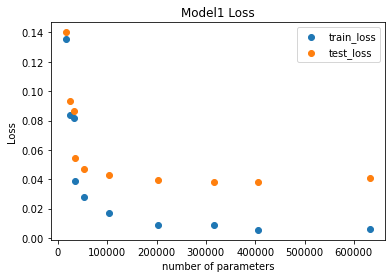

In [156]:
plt.scatter(number_of_parameters,train_loss, label = 'train_loss')
plt.scatter(number_of_parameters,test_loss, label = 'test_loss')
plt.title('Model1 Loss')
plt.ylabel('Loss')
plt.xlabel('number of parameters')
plt.legend()
plt.savefig("generalization_loss.png")

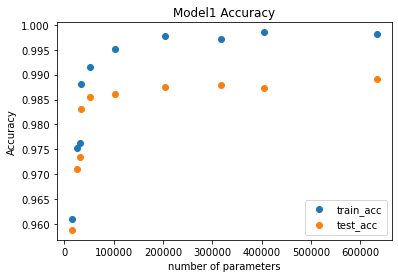

In [157]:
plt.scatter(number_of_parameters,train_acc,label = 'train_acc')
plt.scatter(number_of_parameters,test_acc,label = 'test_acc')
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of parameters')
plt.legend()
plt.savefig("generalization_acc.png")